In [18]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
ROOT_PATH = os.path.join('result_from_server', 'infer_outputs')
SRC_ROOT = os.path.join('dataset')
dataset_names = []
for root, dirs, files in os.walk(SRC_ROOT):
    if root == SRC_ROOT:
        dataset_names.extend(dirs)
        break

In [19]:
for ds_name in dataset_names:
    print(f"ds_name=\"{ds_name}\"\ndirectory = os.path.join(ROOT_PATH, ds_name)")

ds_name="allenai-art"
directory = os.path.join(ROOT_PATH, ds_name)
ds_name="cti-mcq"
directory = os.path.join(ROOT_PATH, ds_name)
ds_name="dreaddit"
directory = os.path.join(ROOT_PATH, ds_name)
ds_name="openai-gsm8k"
directory = os.path.join(ROOT_PATH, ds_name)
ds_name="osai-medmcqa"
directory = os.path.join(ROOT_PATH, ds_name)
ds_name="sentiment-reasoning"
directory = os.path.join(ROOT_PATH, ds_name)
ds_name="tmlab-quail"
directory = os.path.join(ROOT_PATH, ds_name)


In [20]:
# function for drawing and monitoring and drawing the result
def result_checking(ds_name):
    directory = os.path.join(ROOT_PATH, ds_name)
    top, subdirs, _ = next(os.walk(directory))
    values = {}
    mask = len(f'1percent{ds_name}')
    for sd in sorted(subdirs):
        sd_path = os.path.join(top, sd)
        for fname in os.listdir(sd_path):
            fpath = os.path.join(sd_path, fname)
            if os.path.isfile(fpath):
                try:
                    new_sd = sd.split('_')
                    new_sd = f"{new_sd[2]} > {new_sd[3]}"
                except:
                    new_sd = sd
                cur_df = pd.read_json(fpath, lines=True)
                total = cur_df.shape[0]
                correct = cur_df[cur_df['label'] == cur_df['predict']].count(True).shape[0]
                # print(f"Dataset: {ds_name}, FT_param: {new_sd}, accuracy: {correct / total}")
                print(f"Label: {cur_df['label'].unique()}, Predict: {cur_df['predict'].unique()}")
                acc = correct / total
                acc = round(acc, 4)
                print(f"Dataset: {ds_name:<12}  FT_param: {new_sd:<53}  accuracy: {acc:>12.6f}")
                if new_sd[:-mask] in values.keys():
                    values[new_sd[:-mask]].append(acc)
                else:
                    values[new_sd] = [acc]

    fig, axes = plt.subplots(2, 3, figsize=(12, 6), constrained_layout=True)

    print(f'Accuracy for the zero-shot testing: {values['zero-shot'][0]}')
    based = values[f'fir_on_{ds_name}']
    filtered_value = {k: v for k, v in values.items() if k.startswith(f'{ds_name}')}

    axs = axes.ravel()
    print(ds_name)
    # 一個資料 -> 一個 subplot，只畫一條線
    for i, ((fvk, fvv), ax) in enumerate(zip(filtered_value.items(), axs)):
        ds = fvk.split(">")
        fd, fs = ds[0].strip(), ds[1].strip()
        # relative gain is defined as second - first / first
        print(based)
        rg1 = ((fvv[0]) - (based[0]))/ (based[0])
        rg2 = ((fvv[1]) - (based[0]))/ (based[0])
        # 你的原本 x/y
        x = [f"ft_d1", f"ft_d1_d2", f"ft_d1_d2+1%d1"]
        y = based + fvv

        ax.plot(x, y)              # 每個子圖只呼叫一次 plot
        ax.set_title(f"d1 = {fd}, d2 = {fs}\n rel_gain1 = {rg1}\n rel_gain2 = {rg2}")
    fig.suptitle(f"{ds_name}", fontsize=16, y=1.02)
    # 若子圖數量多於資料筆數，把多餘的子圖關掉
    for ax in axs[len(filtered_value):]:
        ax.axis('off')

    plt.show()
    return values

Label: ['HA' 'HB'], Predict: ['HA' 'HB']
Dataset: allenai-art   FT_param: fir_on_allenai-art                                     accuracy:     0.934000
Label: ['HA' 'HB'], Predict: ['HA' 'HB' 'B' 'C']
Dataset: allenai-art   FT_param: allenai-art > cti-mcq                                  accuracy:     0.921800
Label: ['HA' 'HB'], Predict: ['HA' 'HB' 'B']
Dataset: allenai-art   FT_param: allenai-art > cti-mcq1percentallenai-art               accuracy:     0.928900
Label: ['HA' 'HB'], Predict: ['NS' 'HB' 'S' 'HA']
Dataset: allenai-art   FT_param: allenai-art > dreaddit                                 accuracy:     0.781800
Label: ['HA' 'HB'], Predict: ['HA' 'HB' 'NS' 'S']
Dataset: allenai-art   FT_param: allenai-art > dreaddit1percentallenai-art              accuracy:     0.916300
Label: ['HA' 'HB'], Predict: ['HA' 'HB' '10' '30' '5' '48' '40' '6' '8' '15' '12' '2000' '50' '7' '2'
 '20' '18' '3' 'HB,000' '4' '11' 'HB,HB' '100' '60' '14' '200' 'HB,200'
 '9' '24']
Dataset: allenai-art   FT

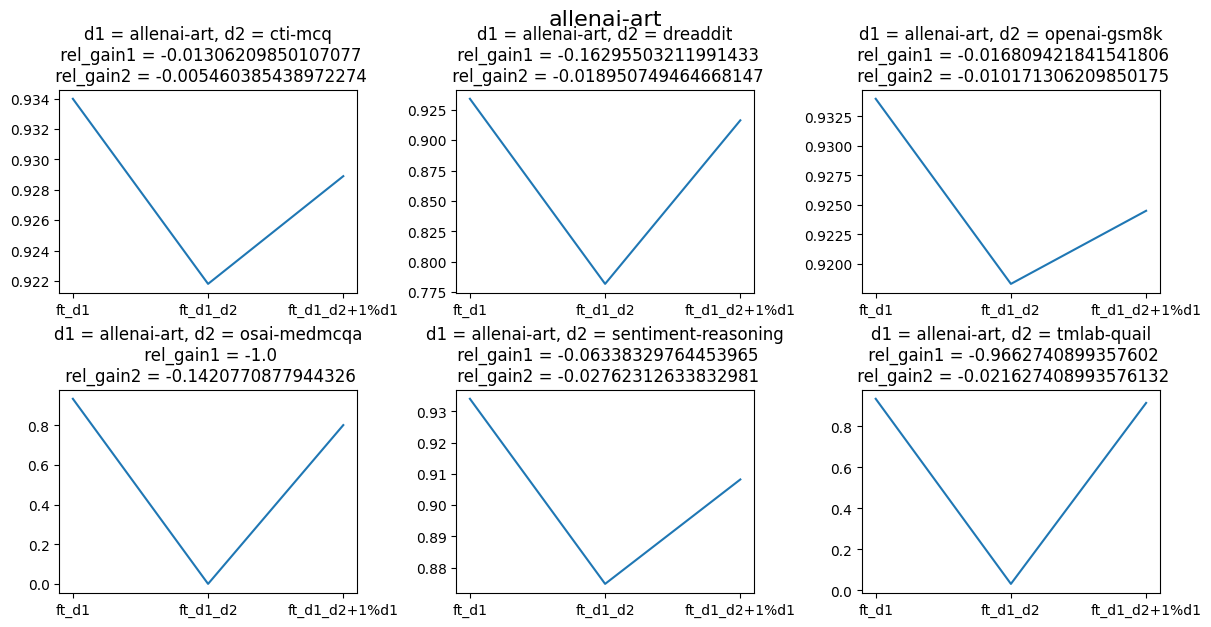

In [21]:
# Allenai-art
allenai_art = result_checking('allenai-art')

Label: ['A' 'B' 'C' 'D' 'b'], Predict: ['B' 'C' 'A' 'D']
Dataset: cti-mcq       FT_param: fir_on_cti-mcq                                         accuracy:     0.575300
Label: ['A' 'B' 'C' 'D' 'b'], Predict: ['HA' 'HB']
Dataset: cti-mcq       FT_param: cti-mcq > allenai-art                                  accuracy:     0.000000
Label: ['A' 'B' 'C' 'D' 'b'], Predict: ['B' 'C' 'HB']
Dataset: cti-mcq       FT_param: cti-mcq > allenai-art1percentcti-mcq                   accuracy:     0.362200
Label: ['A' 'B' 'C' 'D' 'b'], Predict: ['NS']
Dataset: cti-mcq       FT_param: cti-mcq > dreaddit                                     accuracy:     0.000000
Label: ['A' 'B' 'C' 'D' 'b'], Predict: ['A' 'B' 'C' 'D' 'NS'
 'NSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSNSN

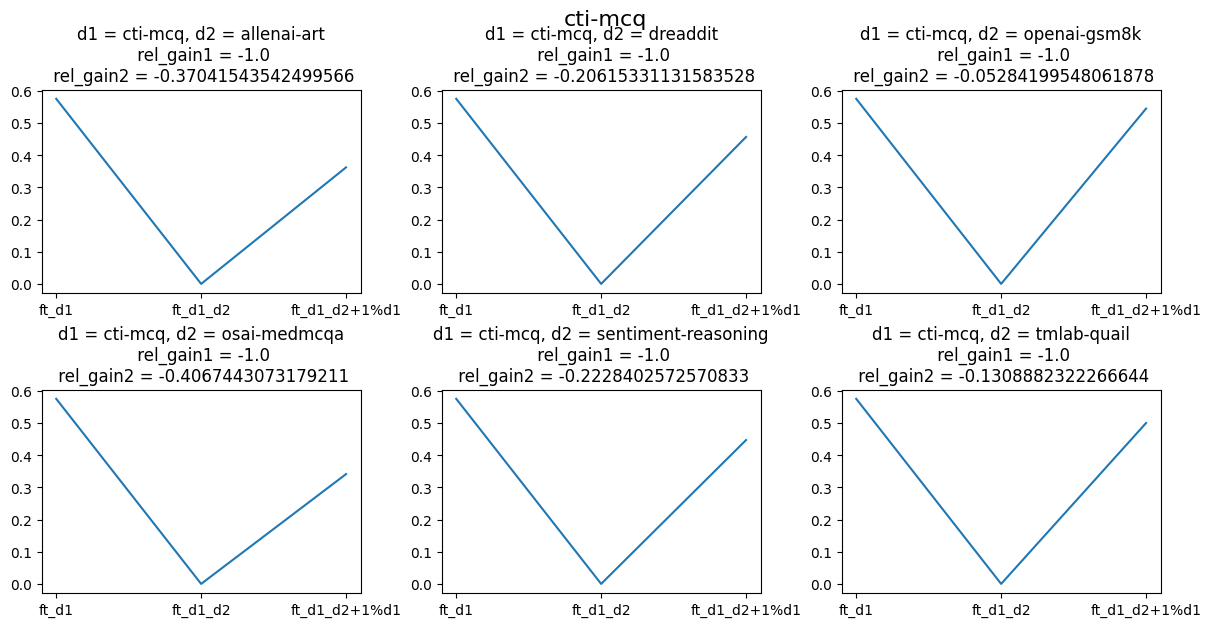

In [22]:
# cti-mcq
cti_mcq = result_checking("cti-mcq")

Label: ['NS' 'S'], Predict: ['NS' 'S']
Dataset: dreaddit      FT_param: fir_on_dreaddit                                        accuracy:     0.798400
Label: ['NS' 'S'], Predict: ['HA' 'HB' 'HBHB'
 'HBHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHBHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHBHAHAHAHAHAHBHAHAHAHBHAHBHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHAHA

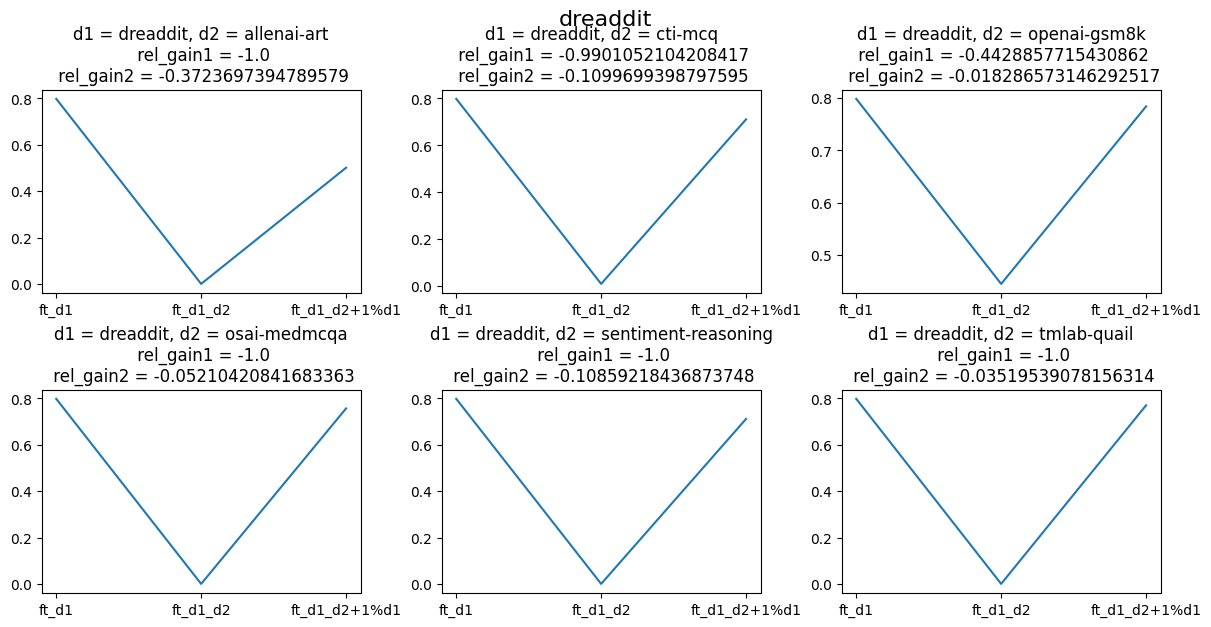

In [23]:
dreaddit = result_checking("dreaddit")

Label: ['9' '2,000' '270' '30' '3' '15' '240' '200' '100' '8' '95' '400' '24'
 '184' '18' '1700' '36' '4' '87' '196' '752' '56' '12' '50' '338' '48'
 '26' '40' '23' '7' '1' '110' '200,000' '9200' '1350' '90' '1200' '35'
 '210' '5' '150' '6' '10' '13' '204' '273' '61' '54' '14' '960' '1056'
 '55' '42' '96000' '43' '60' '5500' '315' '49' '80' '21' '8100' '192'
 '360' '2' '155' '3900' '680' '38' '52' '294' '45' '55,000' '121' '106000'
 '96' '130' '900' '32' '325' '300' '436' '160' '4625' '114' '132' '840'
 '264' '502' '437' '8000' '24500' '15400' '20' '92' '140' '16' '231'
 '14400' '3300' '480' '26400' '112' '500' '56000' '162' '75' '1000' '65'
 '70' '1172' '88' '19' '120' '188' '750' '39' '252' '28125' '106' '46'
 '720' '58' '180' '34' '3600' '78' '378' '105' '22' '25' '99' '11' '85'
 '7200' '307' '69' '1110' '37' '44' '203' '72' '146' '660' '320' '630'
 '86' '1260' '64' '1500' '245' '24000' '800' '828' '2950' '275' '224'
 '448000' '280' '115' '125' '5844' '370' '27' '1,600' '7875' '4000

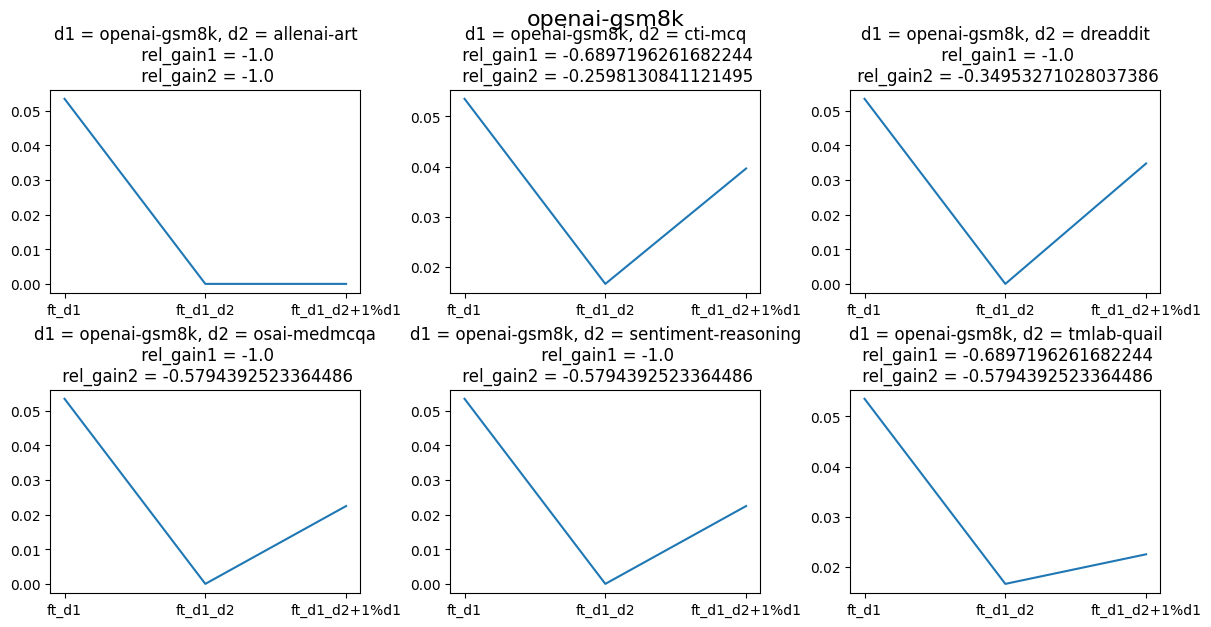

In [24]:
openai_gsm8k = result_checking("openai-gsm8k")

Label: ['OPB' 'OPD' 'OPC' 'OPA'], Predict: ['OPB' 'OPC' 'OPA' 'OPD']
Dataset: osai-medmcqa  FT_param: fir_on_osai-medmcqa                                    accuracy:     0.594700
Label: ['OPB' 'OPD' 'OPC' 'OPA'], Predict: ['HA' 'HB']
Dataset: osai-medmcqa  FT_param: osai-medmcqa > allenai-art                             accuracy:     0.000000
Label: ['OPB' 'OPD' 'OPC' 'OPA'], Predict: ['OPA' 'OPB' 'OPC' 'OPD']
Dataset: osai-medmcqa  FT_param: osai-medmcqa > allenai-art1percentosai-medmcqa         accuracy:     0.467400
Label: ['OPB' 'OPD' 'OPC' 'OPA'], Predict: ['B' 'C' 'A' 'D']
Dataset: osai-medmcqa  FT_param: osai-medmcqa > cti-mcq                                 accuracy:     0.000000
Label: ['OPB' 'OPD' 'OPC' 'OPA'], Predict: ['OPC' 'OPB' 'OPA' 'OPD' 'B' 'C' 'A']
Dataset: osai-medmcqa  FT_param: osai-medmcqa > cti-mcq1percentosai-medmcqa             accuracy:     0.559700
Label: ['OPB' 'OPD' 'OPC' 'OPA'], Predict: ['NS' 'S']
Dataset: osai-medmcqa  FT_param: osai-medmcqa > dreaddit

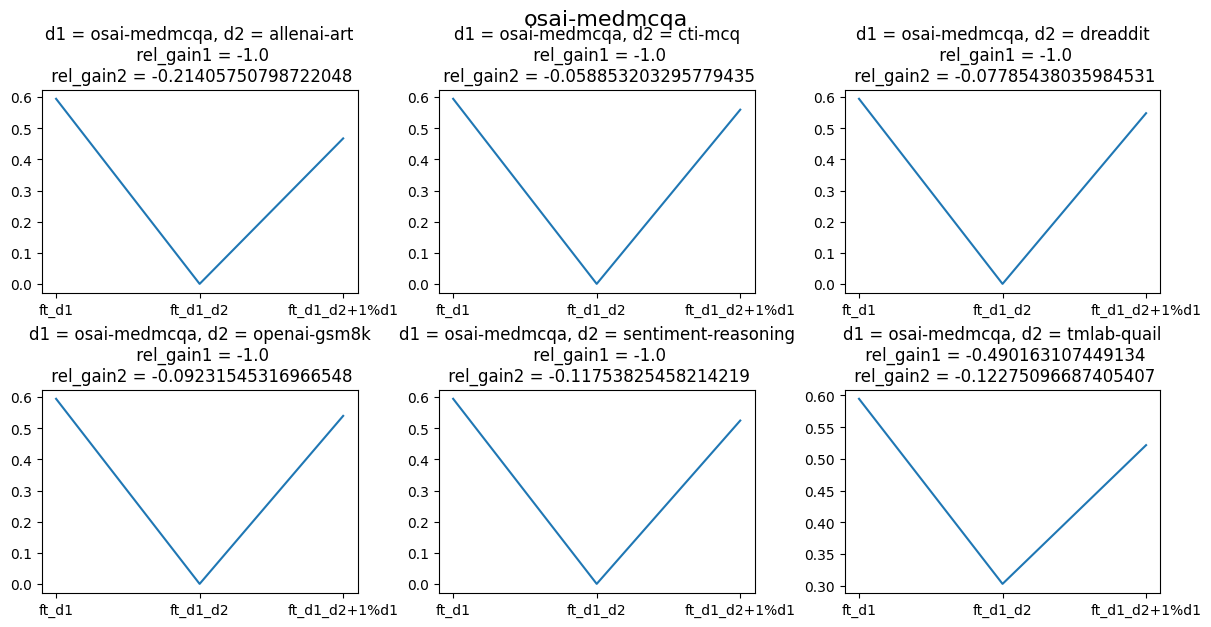

In [25]:
osai_medmcqa = result_checking("osai-medmcqa")

Label: ['neutral' 'negative' 'positive'], Predict: ['positive' 'neutral' 'negative']
Dataset: sentiment-reasoning  FT_param: fir_on_sentiment-reasoning                             accuracy:     0.712000
Label: ['neutral' 'negative' 'positive'], Predict: ['HB' 'HA']
Dataset: sentiment-reasoning  FT_param: sentiment-reasoning > allenai-art                      accuracy:     0.000000
Label: ['neutral' 'negative' 'positive'], Predict: ['positive' 'neutral' 'negative' 'HB']
Dataset: sentiment-reasoning  FT_param: sentiment-reasoning > allenai-art1percentsentiment-reasoning  accuracy:     0.666800
Label: ['neutral' 'negative' 'positive'], Predict: ['C' 'B' 'A' 'D']
Dataset: sentiment-reasoning  FT_param: sentiment-reasoning > cti-mcq                          accuracy:     0.000000
Label: ['neutral' 'negative' 'positive'], Predict: ['positive' 'neutral' 'negative']
Dataset: sentiment-reasoning  FT_param: sentiment-reasoning > cti-mcq1percentsentiment-reasoning  accuracy:     0.717700
Label: [

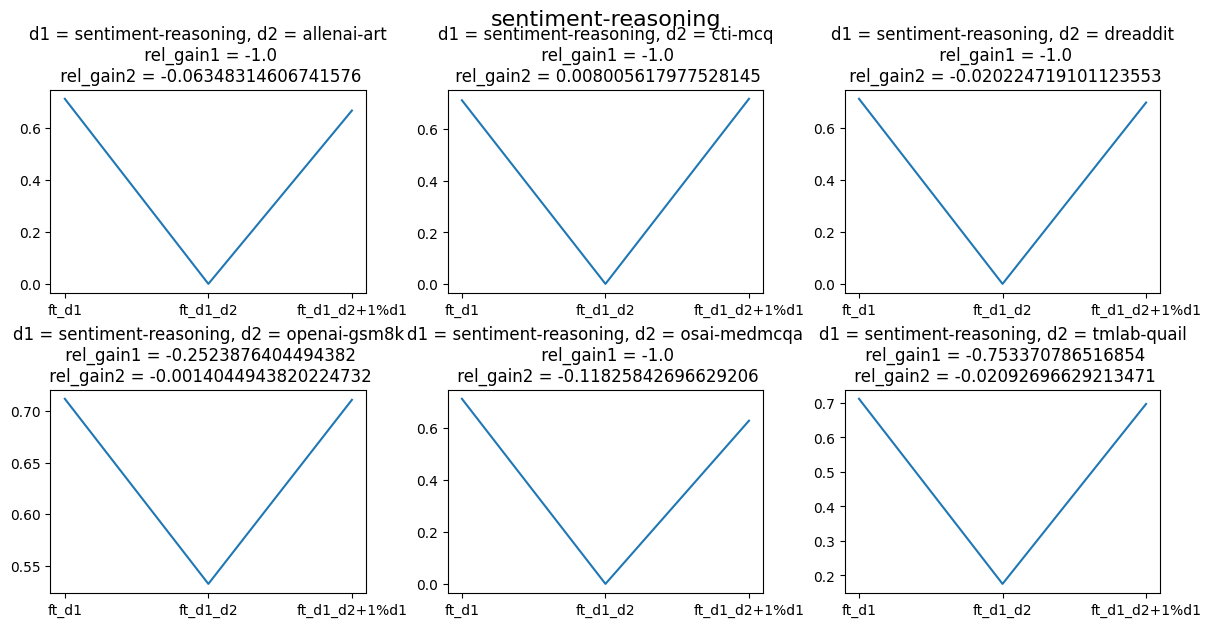

In [26]:
sentiment_reasoning = result_checking("sentiment-reasoning")

Label: ['OP1' 'OP4' 'OP2' 'OP3'], Predict: ['OP1' 'OP4' 'OP2' 'OP3']
Dataset: tmlab-quail   FT_param: fir_on_tmlab-quail                                     accuracy:     0.703700
Label: ['OP1' 'OP4' 'OP2' 'OP3'], Predict: ['HA' 'HB']
Dataset: tmlab-quail   FT_param: tmlab-quail > allenai-art                              accuracy:     0.000000
Label: ['OP1' 'OP4' 'OP2' 'OP3'], Predict: ['OP1' 'OP2' 'OP4']
Dataset: tmlab-quail   FT_param: tmlab-quail > allenai-art1percenttmlab-quail           accuracy:     0.335300
Label: ['OP1' 'OP4' 'OP2' 'OP3'], Predict: ['A' 'D' 'B' 'C']
Dataset: tmlab-quail   FT_param: tmlab-quail > cti-mcq                                  accuracy:     0.000000
Label: ['OP1' 'OP4' 'OP2' 'OP3'], Predict: ['OP1' 'OP4' 'OP2' 'OP3']
Dataset: tmlab-quail   FT_param: tmlab-quail > cti-mcq1percenttmlab-quail               accuracy:     0.656000
Label: ['OP1' 'OP4' 'OP2' 'OP3'], Predict: ['NS' 'S']
Dataset: tmlab-quail   FT_param: tmlab-quail > dreaddit                   

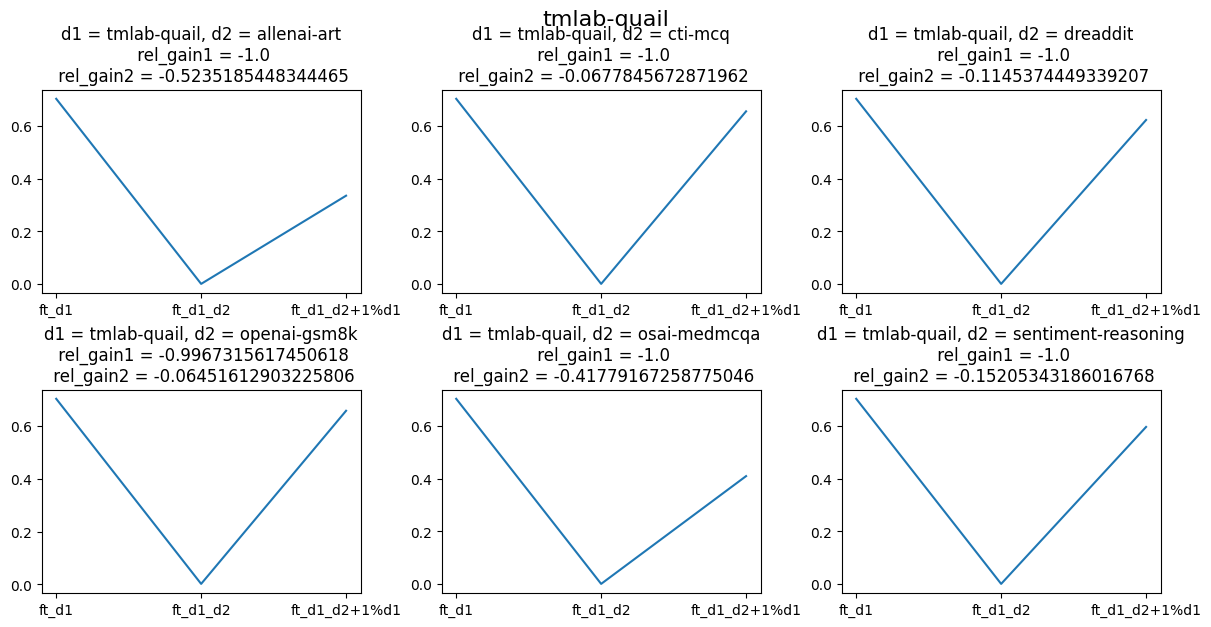

In [27]:
tmlab_quail = result_checking('tmlab-quail')

In [28]:
print(allenai_art)
print(cti_mcq)
total_dataset = {
    "allenai-art": allenai_art, 
    "cti-mcq":cti_mcq,
    "dreaddit": dreaddit,
    "openai-gsm8k": openai_gsm8k,
    "osai-medmcqa": osai_medmcqa,
    "sentiment-reasoning": sentiment_reasoning,
    "tmlab-quail":tmlab_quail
}
# fill the table
keys = list(total_dataset.keys())
ft_org = [[0] * len(keys) for _ in range(len(keys))]
ft_1per = [[0] * len(keys) for _ in range(len(keys))]
for i in range(len(keys)):
    dataset1 = keys[i]
    for j in range(len(keys)):
        dataset2 = keys[j]
        org_accuracy = total_dataset[dataset1][f'fir_on_{dataset1}'][0]
        if i == j: 
            ft_org[i][j] = total_dataset[dataset1][f'fir_on_{dataset1}'][0]
            ft_1per[i][j] = total_dataset[dataset1][f'fir_on_{dataset1}'][0]
        else:
            ft_orgacc = total_dataset[dataset1][f'{dataset1} > {dataset2}'][0]
            rg_org = (ft_orgacc - org_accuracy) / org_accuracy 
            ft_org[i][j] = (ft_orgacc, round(rg_org, 4))
            ft_1peracc = total_dataset[dataset1][f'{dataset1} > {dataset2}'][1]
            rg_1per = (ft_1peracc - org_accuracy) / org_accuracy 
            ft_1per[i][j] = (ft_1peracc, round(rg_1per, 4))

{'fir_on_allenai-art': [0.934], 'allenai-art > cti-mcq': [0.9218, 0.9289], 'allenai-art > dreaddit': [0.7818, 0.9163], 'allenai-art > openai-gsm8k': [0.9183, 0.9245], 'allenai-art > osai-medmcqa': [0.0, 0.8013], 'allenai-art > sentiment-reasoning': [0.8748, 0.9082], 'allenai-art > tmlab-quail': [0.0315, 0.9138], 'zero-shot': [0.5157]}
{'fir_on_cti-mcq': [0.5753], 'cti-mcq > allenai-art': [0.0, 0.3622], 'cti-mcq > dreaddit': [0.0, 0.4567], 'cti-mcq > openai-gsm8k': [0.0, 0.5449], 'cti-mcq > osai-medmcqa': [0.0, 0.3413], 'cti-mcq > sentiment-reasoning': [0.0, 0.4471], 'cti-mcq > tmlab-quail': [0.0, 0.5], 'zero-shot': [0.2885]}


In [29]:
df_org = pd.DataFrame(ft_org, index=keys, columns=keys)
df_1per = pd.DataFrame(ft_1per, index=keys, columns=keys)


# Result of the Zero-Shot for each dataset

In [30]:
for key in keys:
    print(f"Zero-shot Result for {key:<20}: {total_dataset[key]['zero-shot'][0]}")

Zero-shot Result for allenai-art         : 0.5157
Zero-shot Result for cti-mcq             : 0.2885
Zero-shot Result for dreaddit            : 0.2804
Zero-shot Result for openai-gsm8k        : 0.0134
Zero-shot Result for osai-medmcqa        : 0.2503
Zero-shot Result for sentiment-reasoning : 0.0
Zero-shot Result for tmlab-quail         : 0.2405


# Result of the finetune for each dataset
- Row indicate which dataset used for first finetune and testing
- Column show the dataset used for second dataset
- for each cell
    - (accuracy, relative gain) or (accuracy)

# Without Replay Data

In [31]:
df_org

,allenai-art,cti-mcq,dreaddit,openai-gsm8k,osai-medmcqa,sentiment-reasoning,tmlab-quail
allenai-art,0.934,"(0.9218, -0.0131)","(0.7818, -0.163)","(0.9183, -0.0168)","(0.0, -1.0)","(0.8748, -0.0634)","(0.0315, -0.9663)"
cti-mcq,"(0.0, -1.0)",0.5753,"(0.0, -1.0)","(0.0, -1.0)","(0.0, -1.0)","(0.0, -1.0)","(0.0, -1.0)"
dreaddit,"(0.0, -1.0)","(0.0079, -0.9901)",0.7984,"(0.4448, -0.4429)","(0.0, -1.0)","(0.0, -1.0)","(0.0, -1.0)"
openai-gsm8k,"(0.0, -1.0)","(0.0166, -0.6897)","(0.0, -1.0)",0.0535,"(0.0, -1.0)","(0.0, -1.0)","(0.0166, -0.6897)"
osai-medmcqa,"(0.0, -1.0)","(0.0, -1.0)","(0.0, -1.0)","(0.0, -1.0)",0.5947,"(0.0, -1.0)","(0.3032, -0.4902)"
sentiment-reasoning,"(0.0, -1.0)","(0.0, -1.0)","(0.0, -1.0)","(0.5323, -0.2524)","(0.0, -1.0)",0.712,"(0.1756, -0.7534)"
tmlab-quail,"(0.0, -1.0)","(0.0, -1.0)","(0.0, -1.0)","(0.0023, -0.9967)","(0.0, -1.0)","(0.0, -1.0)",0.7037


# With 1percent Replay Data

In [32]:
df_1per

,allenai-art,cti-mcq,dreaddit,openai-gsm8k,osai-medmcqa,sentiment-reasoning,tmlab-quail
allenai-art,0.934,"(0.9289, -0.0055)","(0.9163, -0.019)","(0.9245, -0.0102)","(0.8013, -0.1421)","(0.9082, -0.0276)","(0.9138, -0.0216)"
cti-mcq,"(0.3622, -0.3704)",0.5753,"(0.4567, -0.2062)","(0.5449, -0.0528)","(0.3413, -0.4067)","(0.4471, -0.2228)","(0.5, -0.1309)"
dreaddit,"(0.5011, -0.3724)","(0.7106, -0.11)",0.7984,"(0.7838, -0.0183)","(0.7568, -0.0521)","(0.7117, -0.1086)","(0.7703, -0.0352)"
openai-gsm8k,"(0.0, -1.0)","(0.0396, -0.2598)","(0.0348, -0.3495)",0.0535,"(0.0225, -0.5794)","(0.0225, -0.5794)","(0.0225, -0.5794)"
osai-medmcqa,"(0.4674, -0.2141)","(0.5597, -0.0589)","(0.5484, -0.0779)","(0.5398, -0.0923)",0.5947,"(0.5248, -0.1175)","(0.5217, -0.1228)"
sentiment-reasoning,"(0.6668, -0.0635)","(0.7177, 0.008)","(0.6976, -0.0202)","(0.711, -0.0014)","(0.6278, -0.1183)",0.712,"(0.6971, -0.0209)"
tmlab-quail,"(0.3353, -0.5235)","(0.656, -0.0678)","(0.6231, -0.1145)","(0.6583, -0.0645)","(0.4097, -0.4178)","(0.5967, -0.1521)",0.7037
